In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
balance_data = pd.read_excel('D:\Data mining\Python\model.xlsx')

In [3]:
print ("Dataset Lenght:: "), len(balance_data)
print ("Dataset Shape:: "), balance_data.shape

Dataset Lenght:: 
Dataset Shape:: 


(None, (2528, 14))

In [4]:
print ("Dataset:: ")
balance_data.head()

Dataset:: 


,Does the environment impact = 1,Health status = 1,Health status = 3,gov = Cairo,gov = Giza,Air,Water,Dirty_streets_garbage,Noise,Sewage_sanitation,Fruits_vegetablesPesticides,age,son_gender,Respiratory problems
0,1,1,0,1,0,1,2,0,4,0,0,24,1,0
1,1,1,0,1,0,1,0,0,4,0,0,22,1,1
2,1,1,0,1,0,0,0,3,0,0,0,24,1,0
3,1,1,0,1,0,1,2,0,0,0,0,25,0,1
4,1,0,0,1,0,1,0,3,0,5,0,26,0,1


In [5]:
balance_data.columns

Index(['Does the environment impact = 1', 'Health status  = 1',
       'Health status  = 3', 'gov = Cairo', 'gov = Giza', 'Air', 'Water',
       'Dirty_streets_garbage', 'Noise', 'Sewage_sanitation',
       'Fruits_vegetablesPesticides', 'age', 'son_gender',
       'Respiratory problems'],
      dtype='object')

In [6]:
X = balance_data.values[:,0:13]
Y = balance_data.values[:,13]

In [7]:
Y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [55]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [56]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [57]:
print ("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 80.63241106719367)

In [58]:
from sklearn.metrics import roc_curve,roc_auc_score

In [59]:

r_probs = [0 for _ in range(len(y_test))]
D_probs = clf_entropy.predict_proba(X_test)

In [60]:

D_probs = D_probs[:, 1]

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
r_auc = roc_auc_score(y_test, r_probs)
D_auc = roc_auc_score(y_test, D_probs)

In [63]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision tree: AUROC = %.3f' % (D_auc))

Random (chance) Prediction: AUROC = 0.500
Decision tree: AUROC = 0.888


In [64]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
D_fpr, D_tpr, _ = roc_curve(y_test, D_probs)

In [65]:
import matplotlib.pyplot as plt

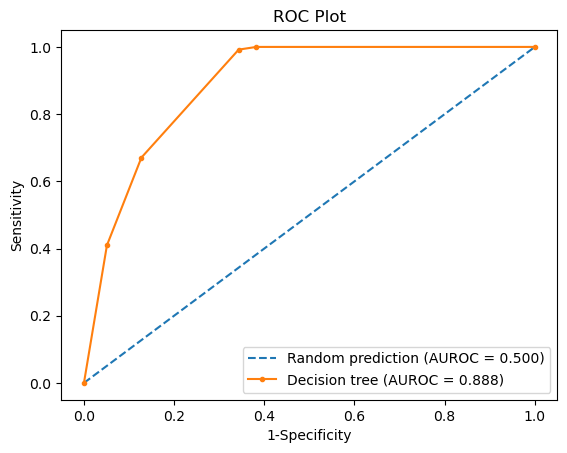

In [66]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(D_fpr, D_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % D_auc)
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [67]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_7 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  1.50
|   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_8 <= 2.00
|   |   |   |--- class: 1
|   |   |--- feature_8 >  2.00
|   |   |   |--- class: 1



In [68]:
fig = plt.figure(figsize=(200, 60))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=balance_data.columns,
                   class_names=['0','1'],
                   filled=True)

In [46]:
fig.savefig("decistion_tree.png")

In [69]:
import os
os.chdir('D:\\Graduation project') #set the new directory 




In [70]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

In [71]:
recall_score(y_test,y_pred)

0.6706827309236948

In [72]:
precision_score(y_test,y_pred)

0.7198275862068966

In [73]:
cm=metrics.confusion_matrix(y_test, y_pred)

In [74]:
cm

array([[445,  65],
       [ 82, 167]], dtype=int64)

In [75]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

In [76]:
specificity

0.8725490196078431